In [1]:
import pickle

#load the data
df_test = pickle.load(open("../Dataset/Large_Class_test_set.pickle", 'rb'))
y_test = pickle.load(open("../Dataset/Large_Class_test_set_y.pickle", 'rb'))

df_train = pickle.load(open("../Dataset/Large_Class_train_set.pickle", 'rb'))
y_train = pickle.load(open("../Dataset/Large_Class_train_set_y.pickle", 'rb'))

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

col_names = ['CLOC','CELOC','NMD','NAD','NMD_NAD','WMC','WMC_NO_CASE','LCOM','LCOM3','LCOM4','TCC','ATFD','CNOR','CNOL','CNOC','CNOA','NOPM','CMNB','RFC','CBO','DIT','DCC','ATFD_10','NIC','NOPF']
features = df_train[col_names]


ct = ColumnTransformer([
        ('somename', StandardScaler(), ['CLOC','CELOC','NMD','NAD','NMD_NAD','WMC','WMC_NO_CASE','LCOM','LCOM3','LCOM4','TCC','ATFD','CNOR','CNOL','CNOC','CNOA','NOPM','CMNB','RFC','CBO','DIT','DCC','ATFD_10','NIC','NOPF'])
    ], remainder='passthrough')

sc = ct.fit(features)
X_train = sc.transform(features)

features_test = df_test[col_names]

X_test= sc.transform(features_test)

In [3]:
from sklearn import ensemble, metrics

rf = ensemble.RandomForestClassifier(
    n_estimators=200,
    max_features="auto",
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=0,
    criterion="entropy",
    random_state=42,
    n_jobs=-1
)

model = rf.fit(X_train,y_train)

In [4]:
y_pred = model.predict(X_test)

print("\nTest metrics")
print("Test report: \n", metrics.classification_report(y_test, y_pred))


Test metrics
Test report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.89      0.88      0.88        48

    accuracy                           0.94       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.94      0.94      0.94       184



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(12,12))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

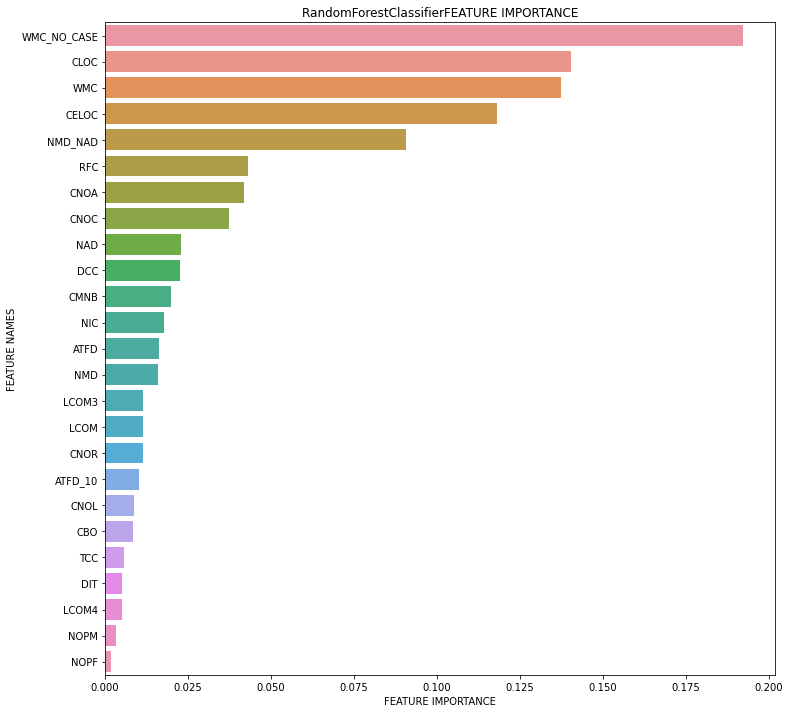

In [6]:
feature_importances = rf.feature_importances_
plot_feature_importance(feature_importances,col_names,'RandomForestClassifier')